# All-in-one script
Een script met de volgende functionaliteiten:
* 3D Animatie
* Raw Data Plotted
* Filtered data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
import math

AB1 = Raw.FoB_raw()

# 3D Animation

<IPython.core.display.Javascript object>


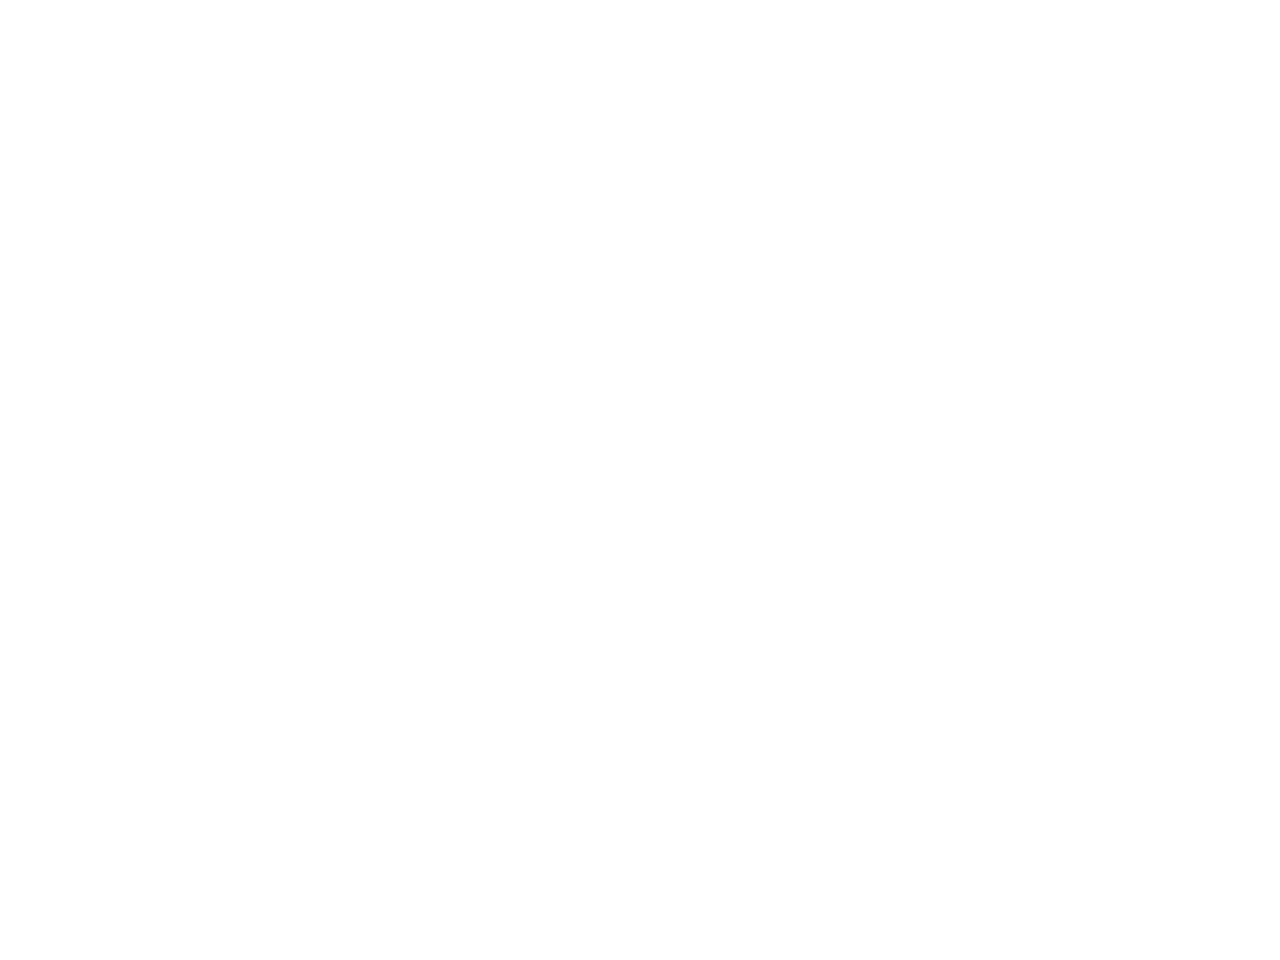

aantal frames:96


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

textsize = 12
AB1.laad("AB1.txt")

def update_lines(num):
    x = AB1.sample(num)
    plt.clf()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[0][xas], x[0][yas], x[0][zas] * -1, c='r')
    ax.text(x[0][xas],x[0][yas],x[0][zas] * -1,  '%s' % (int(AB1.sensornummers()[0])), size=textsize, zorder=1, color='k') 
    ax.scatter(x[1][xas], x[1][yas], x[1][zas] * -1, c='b')
    ax.text(x[1][xas], x[1][yas], x[1][zas] * -1,  '%s' % (int(AB1.sensornummers()[1])), size=textsize, zorder=1, color='k')
    ax.scatter(x[2][xas], x[2][yas], x[2][zas] * -1, c='cyan')
    ax.text(x[2][xas], x[2][yas], x[2][zas] * -1,  '%s' % (int(AB1.sensornummers()[2])), size=textsize, zorder=1, color='k')
    ax.plot([x[1][xas], x[2][xas]], [x[1][yas], x[2][yas]], [x[1][zas] * -1, x[2][zas] * -1], c='b')
    ax.scatter(x[3][xas], x[3][yas], x[3][zas] * -1, c='c')
    ax.text(x[3][xas], x[3][yas], x[3][zas] * -1,  '%s' % (int(AB1.sensornummers()[3])), size=textsize, zorder=1, color='k')
    ax.plot([x[3][xas], x[2][xas]], [x[3][yas], x[2][yas]], [x[3][zas] * -1, x[2][zas] * -1], c='b')
    ax.scatter(x[4][xas], x[4][yas], x[4][zas] * -1, c='darkcyan')
    ax.text(x[4][xas], x[4][yas], x[4][zas] * -1,  '%s' % (int(AB1.sensornummers()[4])), size=textsize, zorder=1, color='k')
    ax.plot([x[3][xas], x[4][xas]], [x[3][yas], x[4][yas]], [x[3][zas] * -1, x[4][zas] * -1], c='b')

    ax.scatter(x[5][xas], x[5][yas], x[5][zas] * -1, c='magenta')
    ax.text(x[5][xas], x[5][yas], x[5][zas] * -1,  '%s' % (int(AB1.sensornummers()[5])), size=textsize, zorder=1, color='k')
    ax.plot([x[1][xas], x[5][xas]], [x[1][yas], x[5][yas]], [x[1][zas] * -1, x[5][zas] * -1], c='m')
    ax.scatter(x[6][xas], x[6][yas], x[6][zas] * -1, c='m')
    ax.text(x[6][xas], x[6][yas], x[6][zas] * -1,  '%s' % (int(AB1.sensornummers()[6])), size=textsize, zorder=1, color='k')
    ax.plot([x[6][xas], x[5][xas]], [x[6][yas], x[5][yas]], [x[6][zas] * -1, x[5][zas] * -1], c='m')
    ax.scatter(x[7][xas], x[7][yas], x[7][zas] * -1, c='darkmagenta')
    ax.text(x[7][xas], x[7][yas], x[7][zas] * -1,  '%s' % (int(AB1.sensornummers()[7])), size=textsize, zorder=1, color='k')
    ax.plot([x[6][xas], x[7][xas]], [x[6][yas], x[7][yas]], [x[6][zas] * -1, x[7][zas] * -1], c='m')
    ax.set_zlim(-400,600)
    ax.set_ylim(-800,800)
    ax.set_xlim(800,1500)
    return ax

# Define what columns is the X, Y and Z axis
xas = 1
yas = 2
zas = 3

fig = plt.figure()
update_lines(0)
# print(AB1.sample(0))




# Creating the Animation object
frames = AB1.aantalSamples()
print('aantal frames:%s' % frames)
line_ani = animation.FuncAnimation(fig, update_lines, frames,
                                   interval=200, blit=False)

# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# line_ani.save('line.mp4', writer=writer)
plt.show()

In [3]:
plt.close()

# Raw Data plotted

In [4]:
# Preprate functions for Raw Data ploting
def rotationMatrixToEulerAngles(R):
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6
    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0

    return np.array([x, y, z])

def gradtorad(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/180)*math.pi
    listy[1] = (listx[1] / 180) * math.pi
    listy[2] = (listx[2] / 180) * math.pi
    return listy

def radtograd(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/math.pi)*180
    listy[1] = (listx[1]/math.pi)*180
    listy[2] = (listx[2]/math.pi)*180
    return listy

def tomatrix2(xdf):
#     xdf = dataframe.loc[regelnummer]
    datainmatrix = np.array([[xdf['rot11'],xdf['rot12'],xdf['rot13']],\
                             [xdf['rot21'],xdf['rot22'],xdf['rot23']],\
                             [xdf['rot31'],xdf['rot32'],xdf['rot33']]],np.float64)
    return datainmatrix


<IPython.core.display.Javascript object>


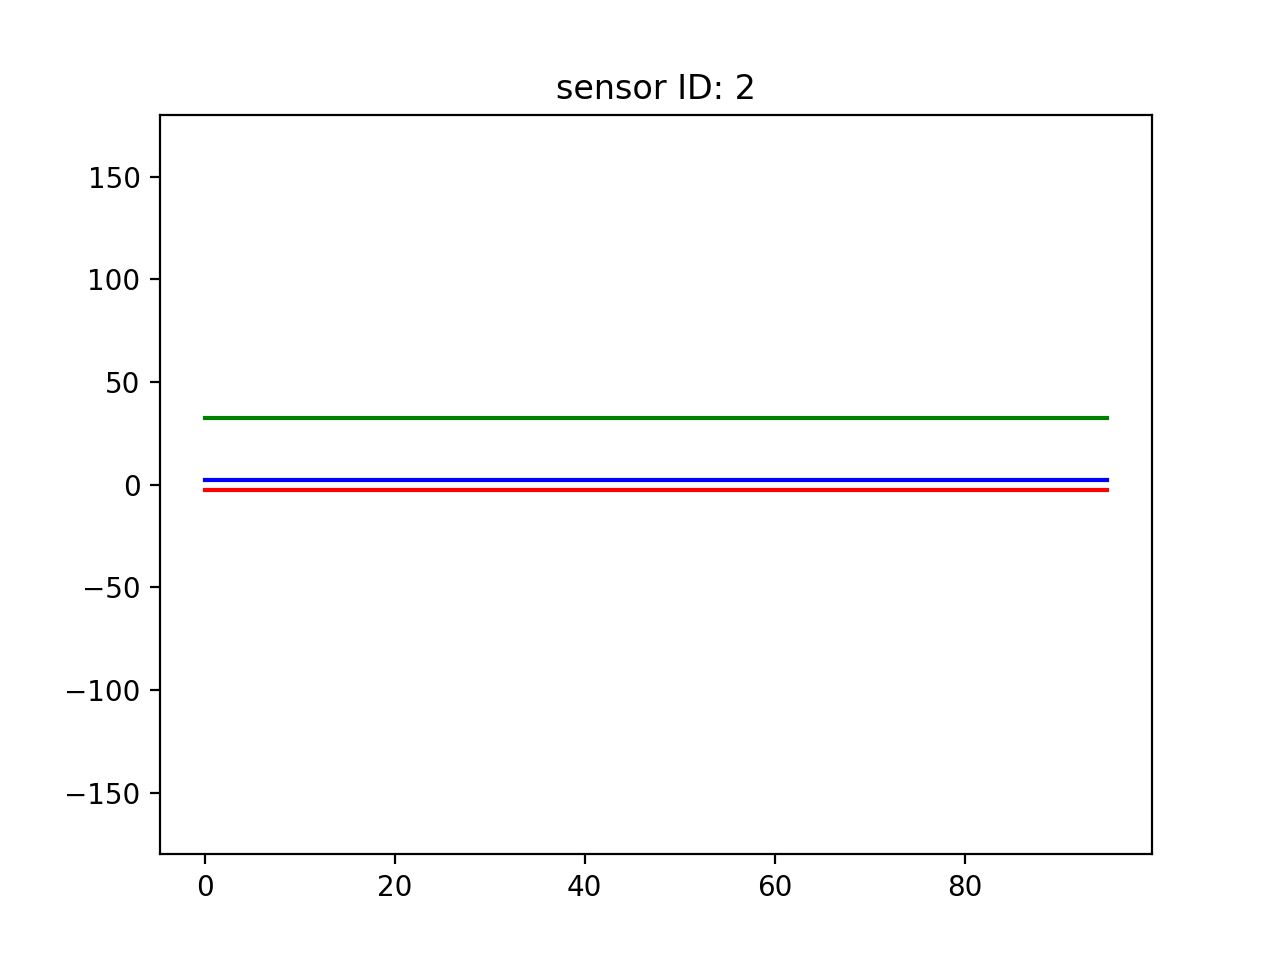

<IPython.core.display.Javascript object>


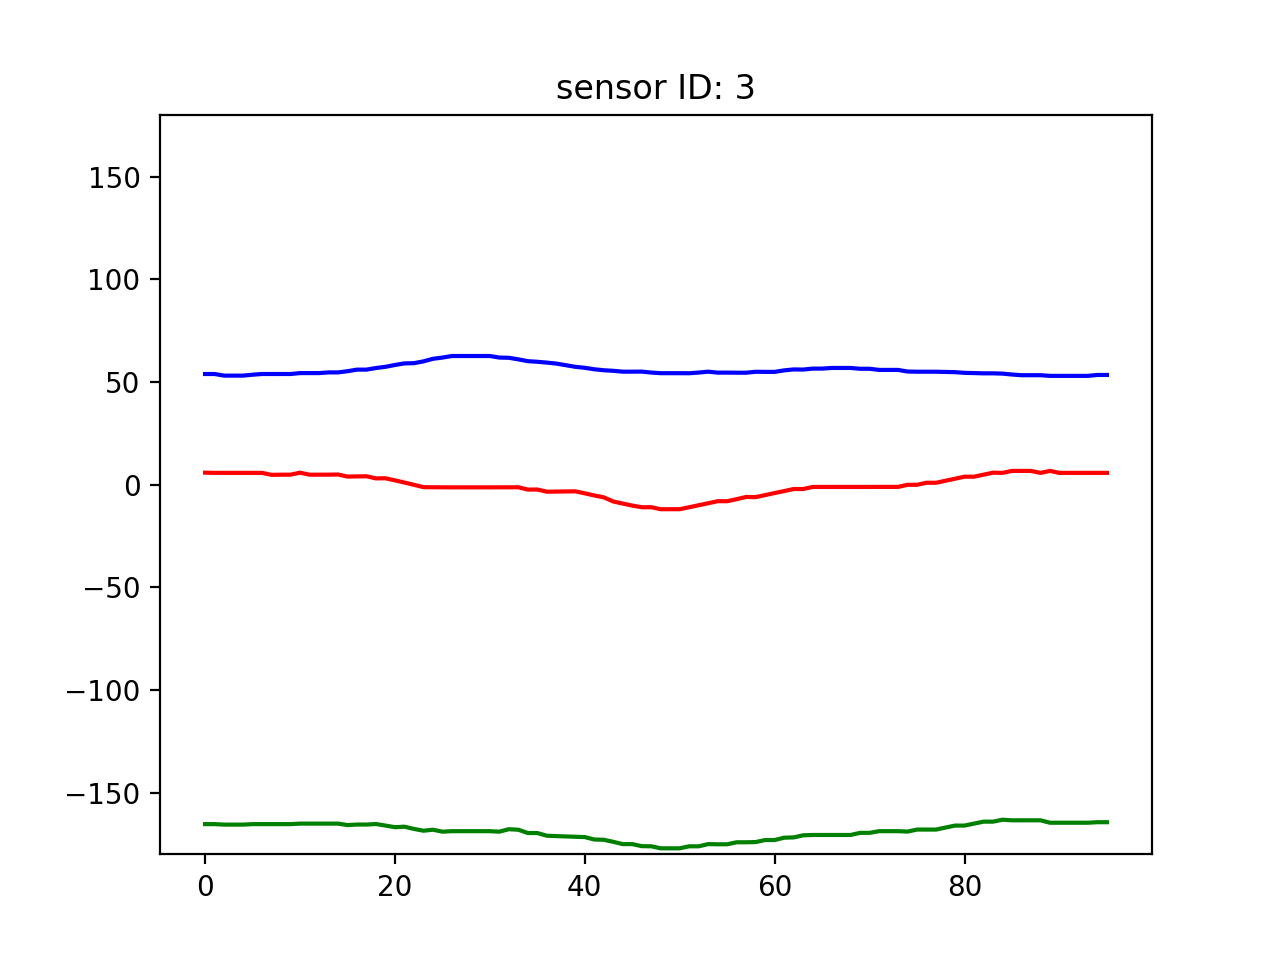

<IPython.core.display.Javascript object>


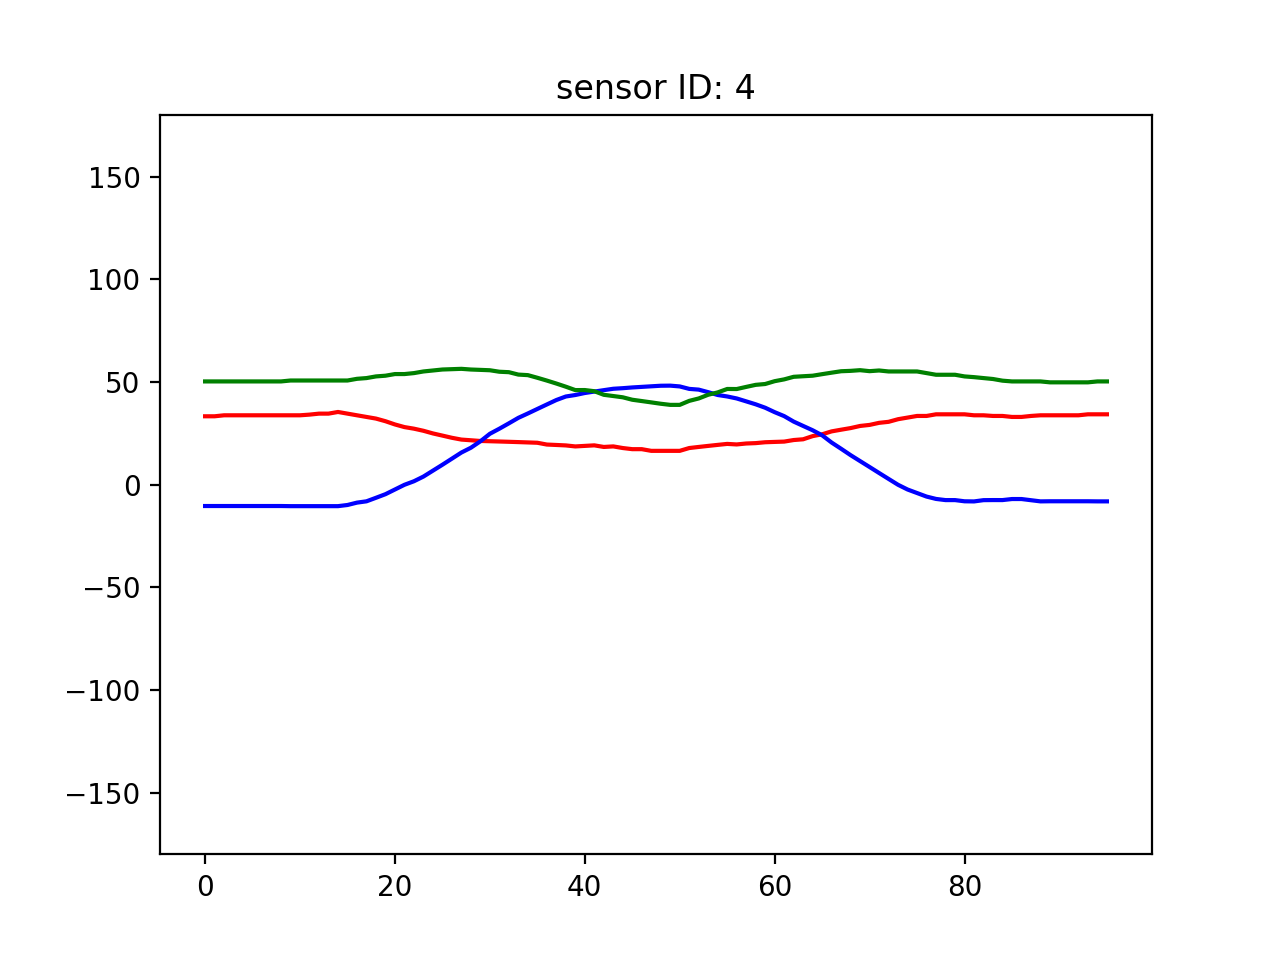

<IPython.core.display.Javascript object>


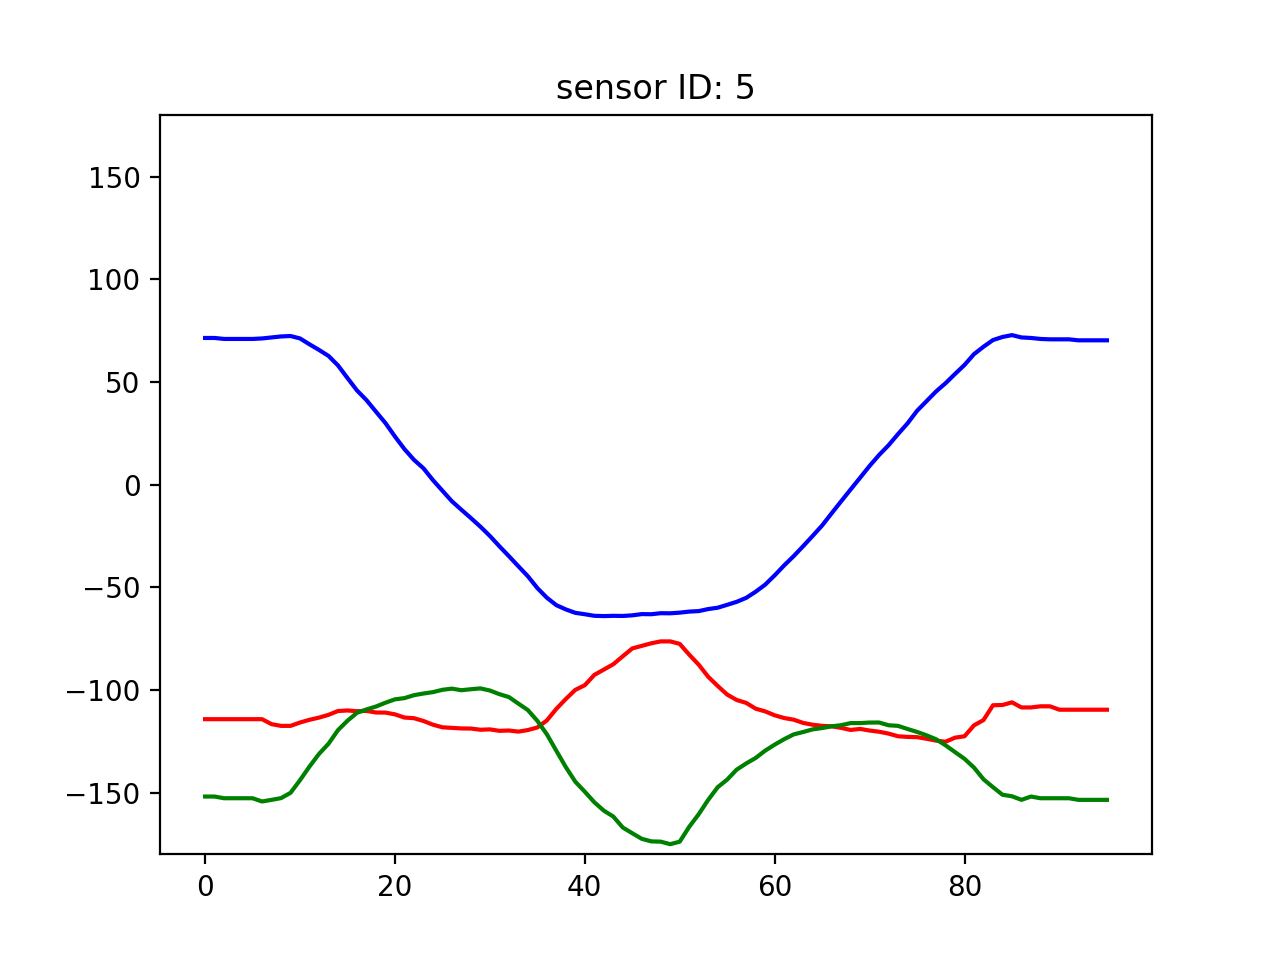

<IPython.core.display.Javascript object>


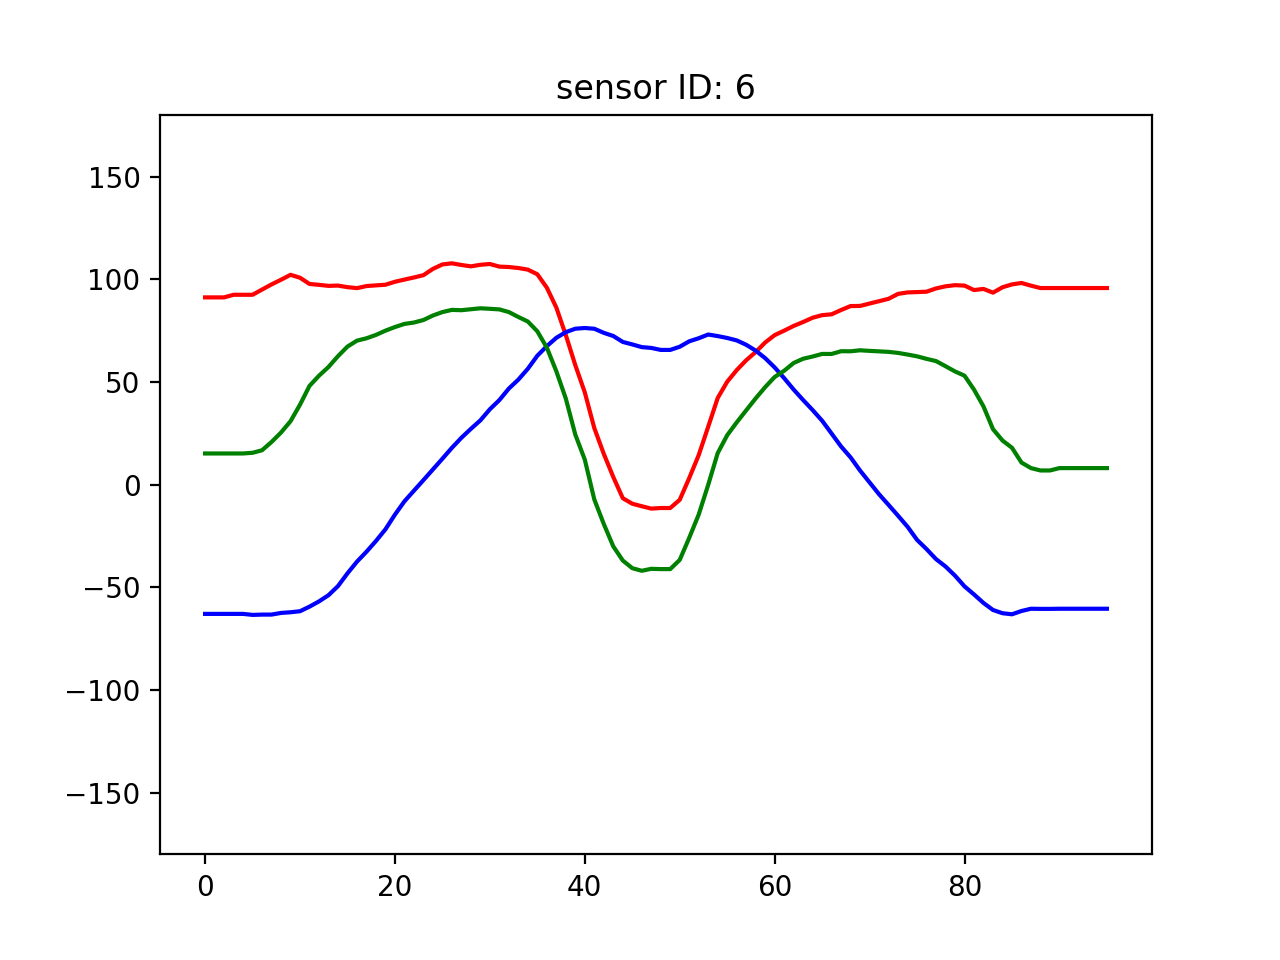

<IPython.core.display.Javascript object>


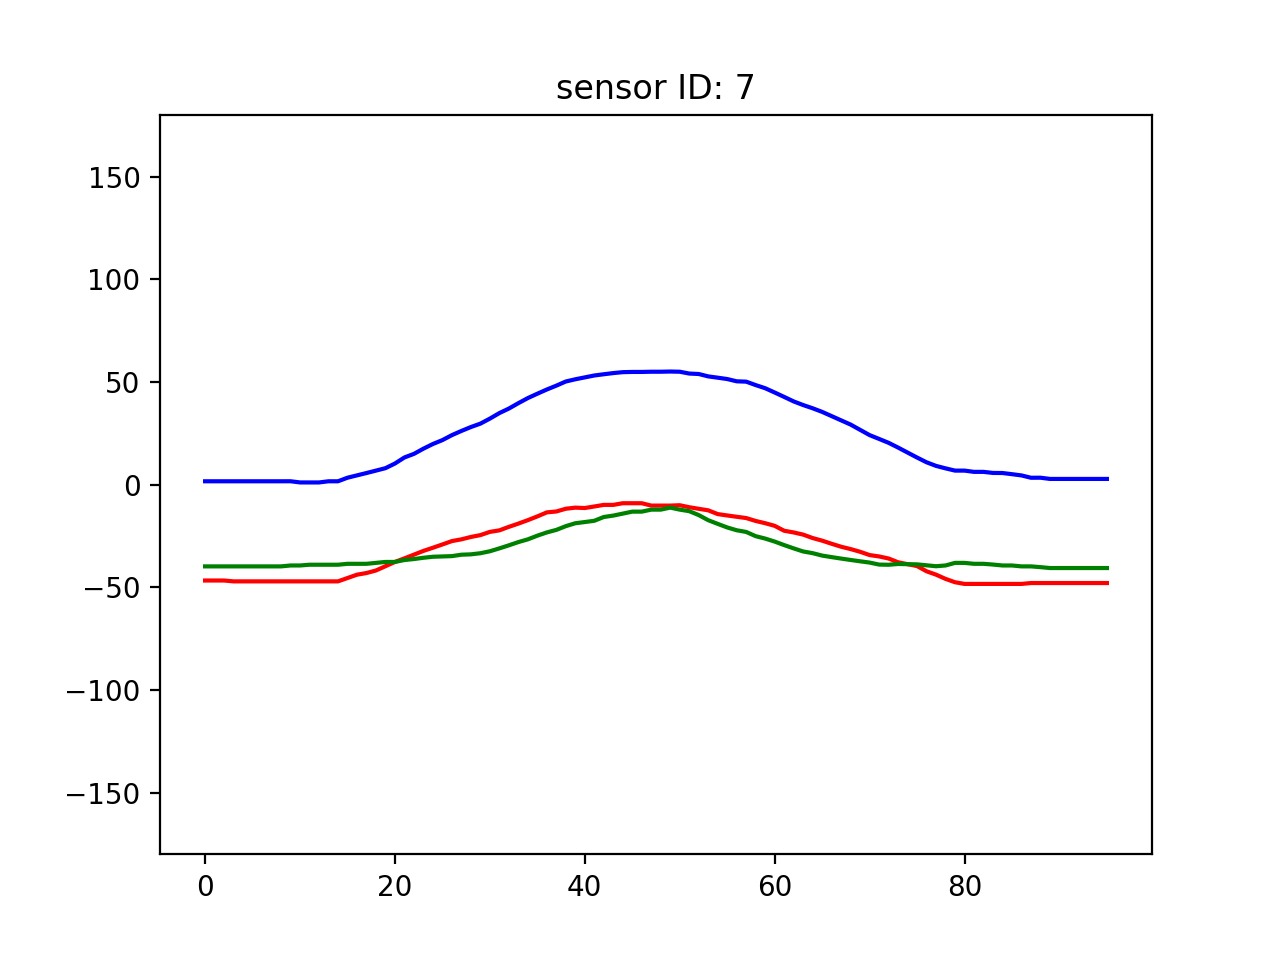

<IPython.core.display.Javascript object>


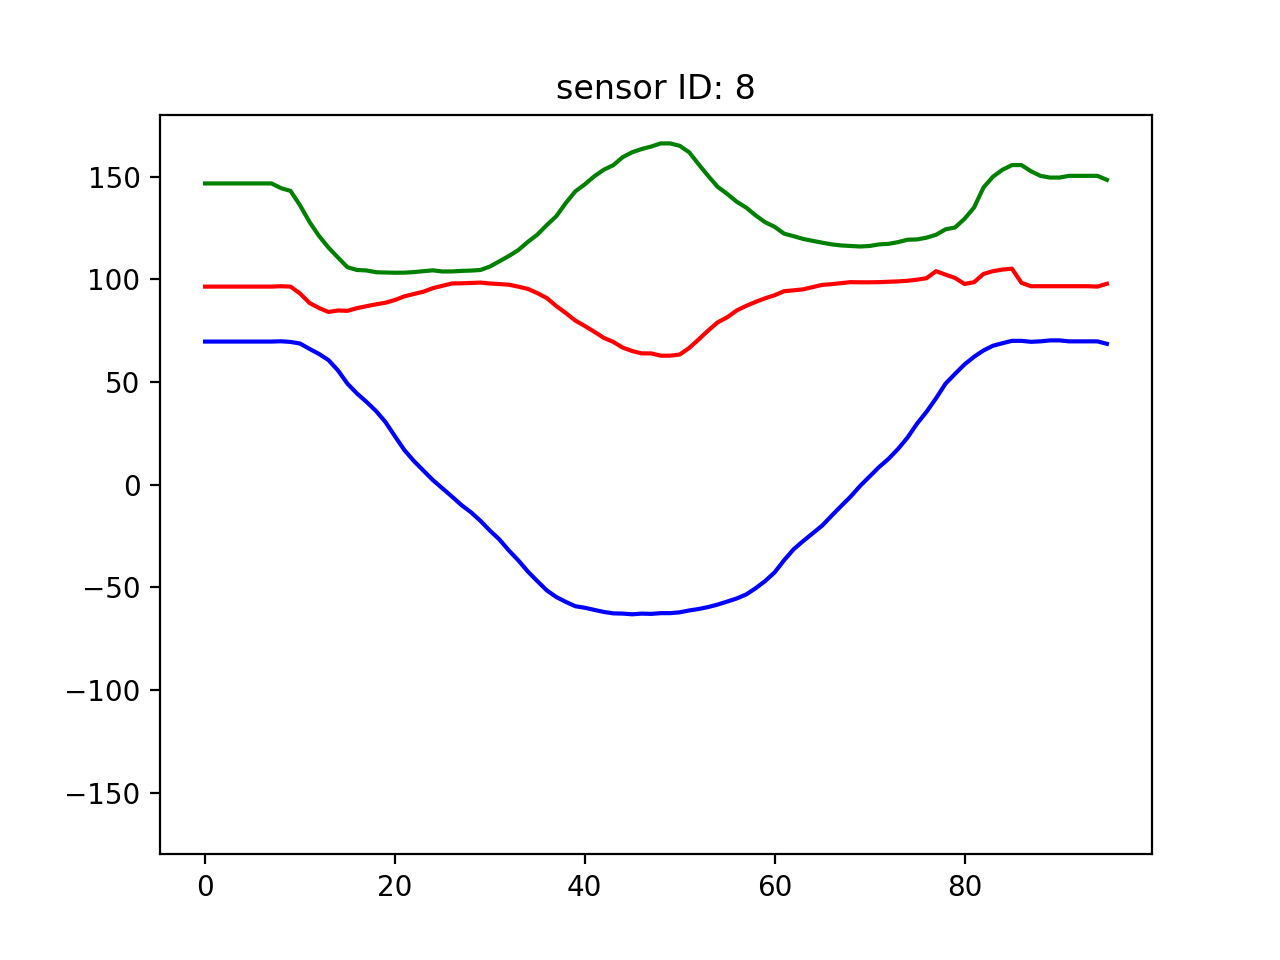

<IPython.core.display.Javascript object>


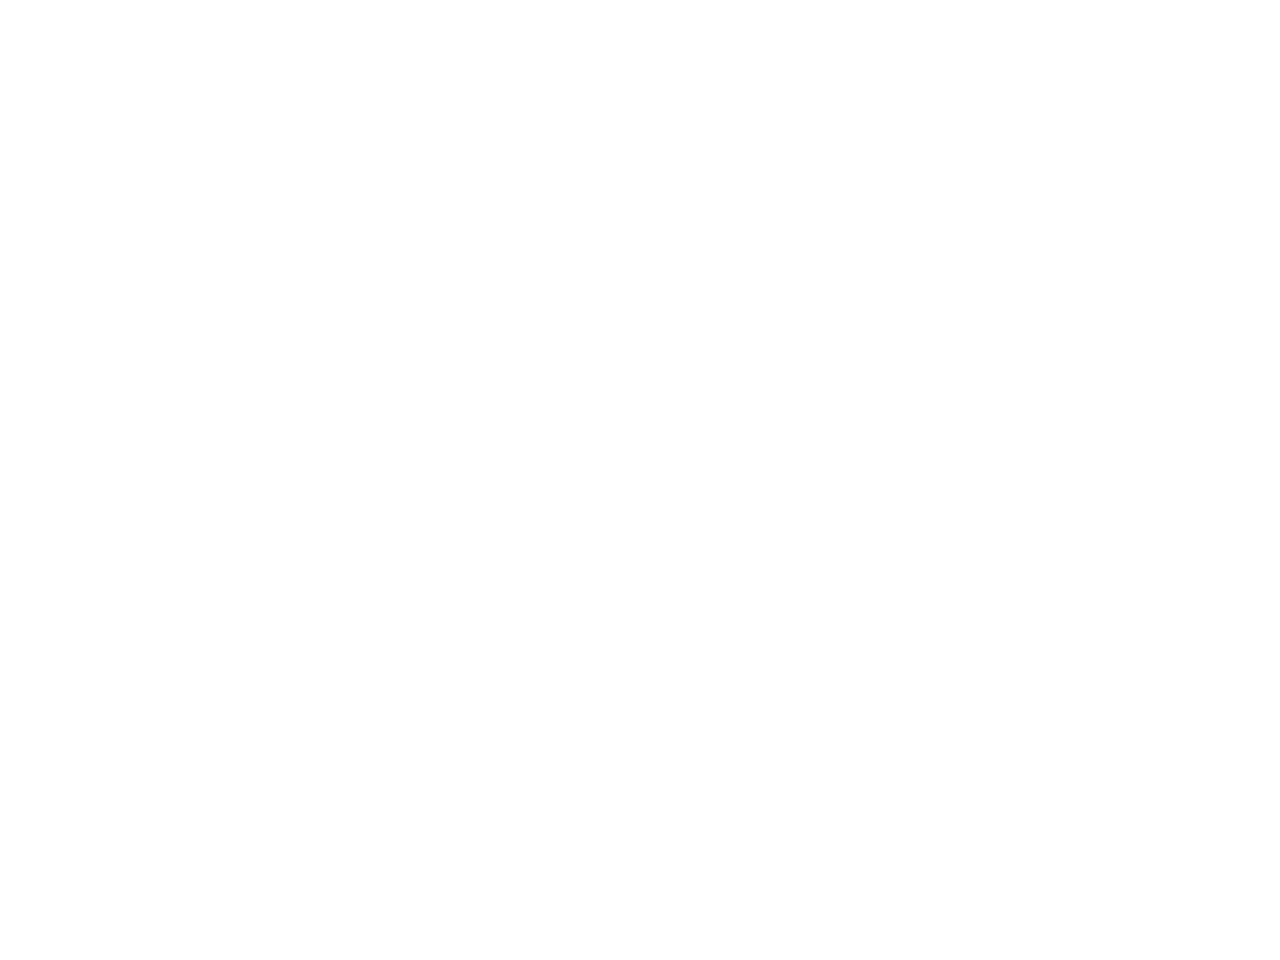

In [5]:
columns=(['sensorID','x','y','-z',\
          'rot11','rot12','rot13',\
          'rot21','rot22','rot23',\
          'rot31','rot32','rot33'])
plt.clf
for i in range(0, 8):
    fig = plt.figure()
    sensor0 = AB1.sensordata(i)
    sensor0df = pd.DataFrame(sensor0.reshape(-1,len(sensor0[0])),columns=columns)
    
    xlist = []
    ylist = []
    zlist = []
    for index, row in sensor0df.iterrows():
        angles = rotationMatrixToEulerAngles(tomatrix2(row))
        waardelist = radtograd(angles)
        xlist.append(waardelist[0])
        ylist.append(waardelist[1])
        zlist.append(waardelist[2])
    #     print('GR Angles[%s]: %s' % (index, waardelist))
#     plt.subplot(4,2,i+1)
    plt.title('sensor ID: %s' % (int(AB1.sensornummers()[i])))
    plt.ylim((-180,180))
    plt.plot(xlist, color = 'red')
    plt.plot(ylist, color = 'blue')
    plt.plot(zlist, color = 'green')
plt.tight_layout()  
plt.show()

In [6]:
plt.close()

# Filtered data

In [7]:
df_cleaned = pd.read_csv('AB1_cleaned.csv', header=None)
df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

# x is naar voren
# y is omhoog
# z is opzij

<IPython.core.display.Javascript object>


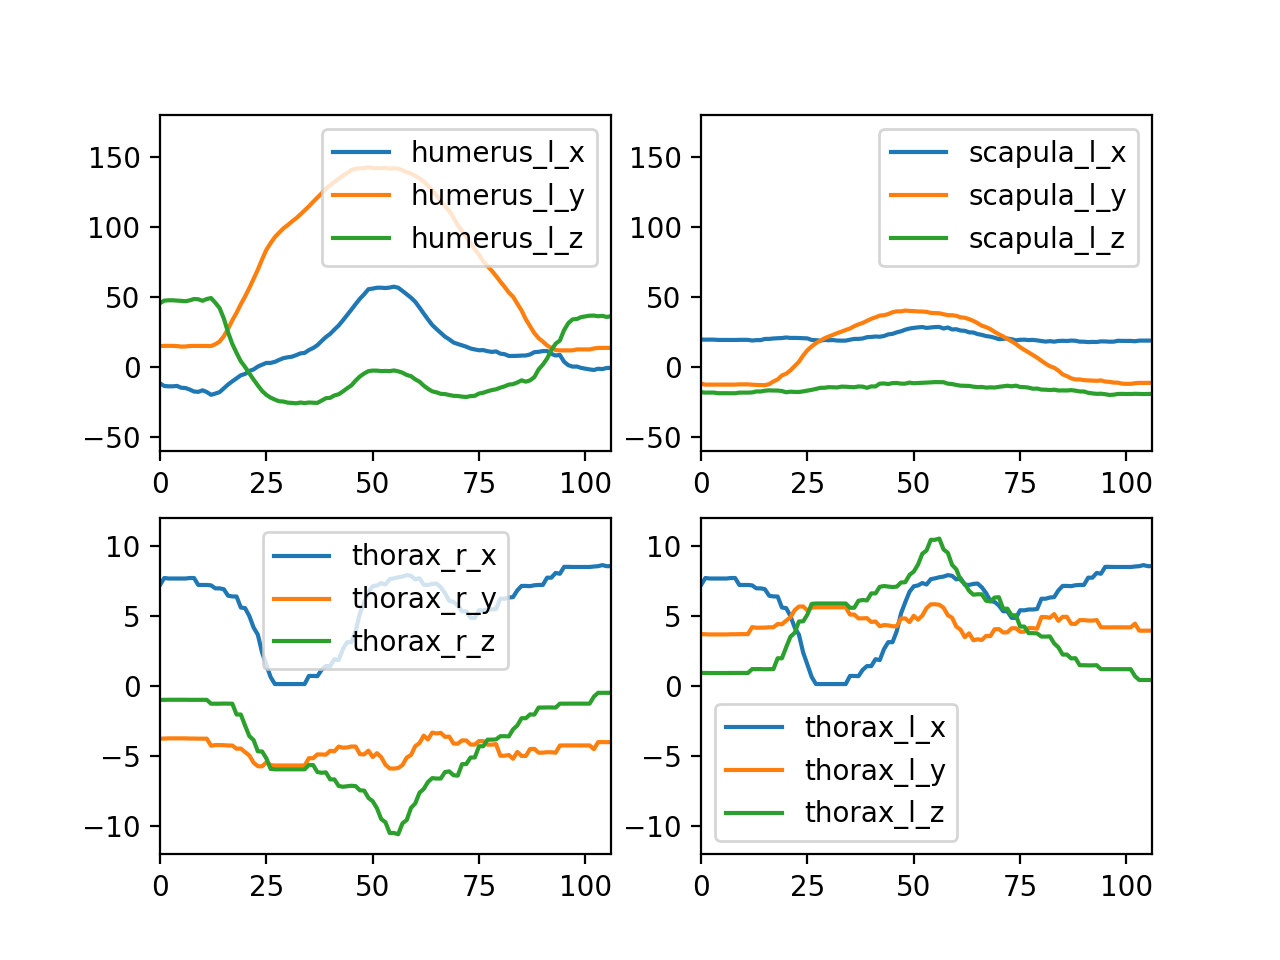

(-12, 12)

In [8]:

fig, axes = plt.subplots(nrows=2, ncols=2)

x = df_cleaned.loc[0:,"humerus_l_x":"humerus_l_z"]
ax = x.plot(ax=axes[0,0])
ax.set_ylim(-60,180)

y = df_cleaned.loc[0:,"scapula_l_x":"scapula_l_z"]
ax = y.plot(ax=axes[0,1])
ax.set_ylim(-60,180)


x = df_cleaned.loc[0:,"thorax_r_x":"thorax_r_z"]
ax = x.plot(ax=axes[1,0])
ax.set_ylim(-12,12)
x = df_cleaned.loc[0:,"thorax_l_x":"thorax_l_z"]
ax = x.plot(ax=axes[1,1])
ax.set_ylim(-12,12)
# plt.close()

<IPython.core.display.Javascript object>


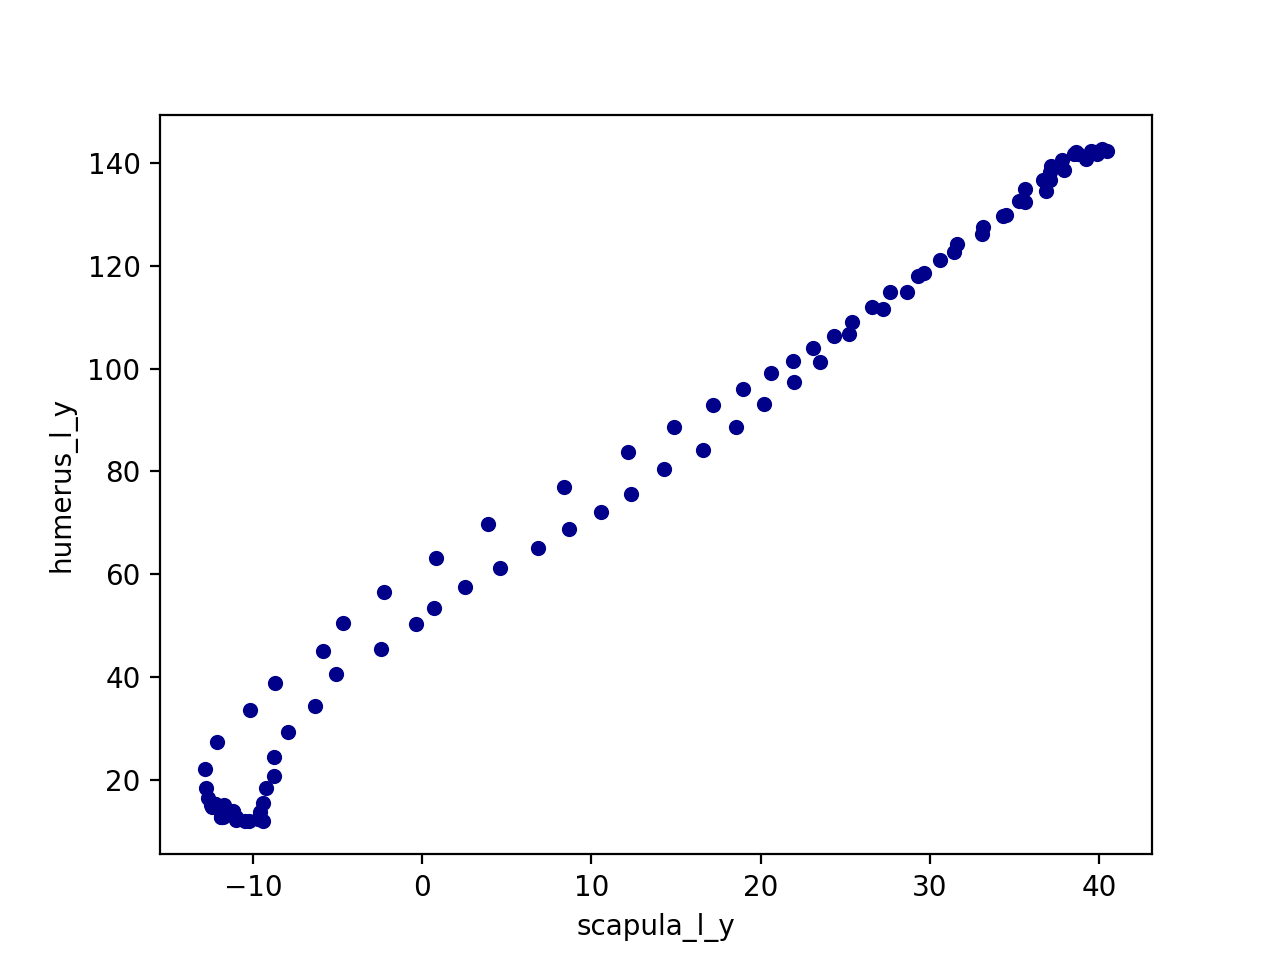

In [11]:
df_cleaned.plot.scatter(x='scapula_l_y', y='humerus_l_y',  c='DarkBlue')

In [10]:
plt.close()